# Factor Analysis of Mixed Data

In [1]:
# Chargement des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scientisttools.decomposition import FAMD
from scientisttools.extractfactor import get_eig,get_famd_ind,get_famd_col,get_famd_var,get_famd_mod,summaryFAMD
from scientisttools.pyplot import plotFAMD,plot_eigenvalues,plot_cosines,plot_contrib,plot_correlation_circle
from plydata import *

In [2]:
# Chargement des données
D = pd.read_excel("Tennis_Players_AFDM.xlsx",index_col=0)
display(D)

,Taille,Lateralite,MainsRevers,Titres,Finales,TitresGC,RolandGarros,BestClassDouble
Joueur,,,,,,,,
Agassi,180,droitier,deux,60,30,8,vainqueur,123
Becker,191,droitier,une,49,28,6,demi,6
Borg,180,droitier,deux,64,25,11,vainqueur,890
Connors,178,gaucher,deux,109,52,8,demi,370
Courier,185,droitier,deux,23,13,4,vainqueur,20
Edberg,187,droitier,une,41,36,6,finale,1
Kafelnikov,190,droitier,deux,26,20,2,vainqueur,4
Kuerten,190,droitier,une,20,9,3,vainqueur,38
Lendl,187,droitier,une,94,50,8,vainqueur,20


In [3]:
#instaciation
afdm = FAMD(n_components = 2,
            row_labels=list(D.index[0:16]), #jusqu'à Wilander
            row_sup_labels=list(D.index[16:]), #à partir de Djokovic
            quanti_labels=['Taille','Titres','Finales','TitresGC'],
            quanti_sup_labels=['BestClassDouble'],
            quali_labels=['Lateralite','MainsRevers','RolandGarros'])
#entraînement
afdm.fit(D)

FAMD(n_components=2, quali_labels=['Lateralite', 'MainsRevers', 'RolandGarros'],
     quanti_labels=['Taille', 'Titres', 'Finales', 'TitresGC'],
     quanti_sup_labels=['BestClassDouble'],
     row_labels=['Agassi', 'Becker', 'Borg', 'Connors', 'Courier', 'Edberg',
                 'Kafelnikov', 'Kuerten', 'Lendl', 'McEnroe', 'Nastase',
                 'Rafter', 'Safin', 'Sampras', 'Vilas', 'Wilander'],
     row_sup_labels=['Djokovic', 'Federer', 'Murray', 'Nadal'])

In [4]:
#valeurs propres
print(get_eig(afdm))

       eigenvalue  difference  proportion  cumulative
Dim.1    3.125964    1.701771   39.074556   39.074556
Dim.2    1.424193    0.286425   17.802418   56.876974


In [5]:
#summary
summaryFAMD(afdm,to_markdown=True)

                     Factor Analysis of Mixed Data - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |
|:------------------------|--------:|--------:|
| Variance                |   3.126 |   1.424 |
| Difference              |   1.702 |   0.286 |
| % of var.               |  39.075 |  17.802 |
| Cumulative of % of var. |  39.075 |  56.877 |

Individuals (the 10 first)

|            |   d(i,G) |   p(i) |   I(i,G) |   Dim.1 |    ctr |   cos2 |   Dim.2 |    ctr |   cos2 |
|:-----------|---------:|-------:|---------:|--------:|-------:|-------:|--------:|-------:|-------:|
| Agassi     |    1.954 |  0.062 |    0.239 |  -0.555 |  0.616 |  0.081 |   1.73  | 13.129 |  0.783 |
| Becker     |    2.275 |  0.062 |    0.323 |   0.835 |  1.395 |  0.135 |  -1.241 |  6.763 |  0.298 |
| Borg       |    2.423 |  0.062 |    0.367 |  -0.716 |  1.025 |  0.087 |   1.875 | 15.431 |  0.599 |
| Connors    |    4.292 |  0.062 |    1.152 |  -3.52  | 24.775 | 

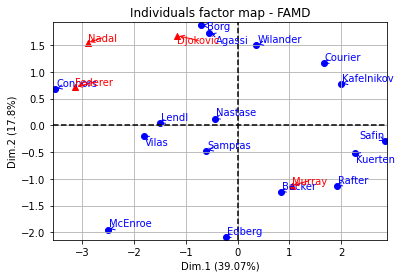

In [6]:
#directement représentation graphique
plotFAMD(afdm,choice='ind',repel=True,ind_sup=True)

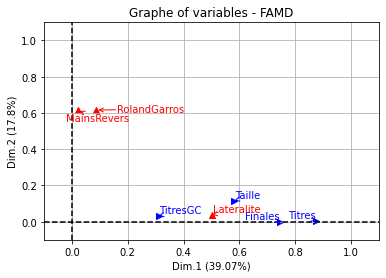

In [7]:
plotFAMD(afdm,choice="var",repel=True,color="contrib")

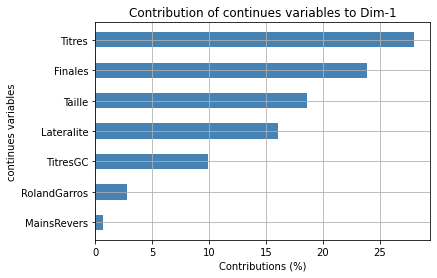

In [8]:
plot_contrib(afdm,choice="var")